# Mathematical Underpinnings - Lab 2

## Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX-(X+\epsilon))^2 = \mathbb{E}((a-1)X - \varepsilon)^2 =
\mathbb{E}[((a-1)^2X^2 - 2(a-1)X\varepsilon + \varepsilon^2)]\\
=(a-1)^2\mathbb{E}X^2 - 2(a-1)\mathbb{E}X\mathbb{E}\varepsilon + \mathbb{E}\varepsilon^2
=(a-1)^2\mathbb{E}X^2 - 2(a-1) \cdot 0 \cdot 0 + \mathbb{E}\varepsilon^2
=(a-1)^2\mathbb{E}X^2 + \mathbb{E}\varepsilon^2
=(a-1)^2 + \sigma^2$




In our task we know $a^* = 1$.

In [1]:
def population_risk(a, sigma_eps):
    return (a-1)**2+sigma_eps**2

### b)

In [3]:
X = np.random.normal(0,1,50)
eps =  np.random.normal(0,1,50)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean((y-a*x)**2)

empirical_risk(1, X, Y)

1.2673967183709751

### c)

In [5]:
a = np.linspace(0,2,10000)
population_risks = [population_risk(i,1) for i in a]
empirical_risks = [empirical_risk(i,X,Y) for i in a]

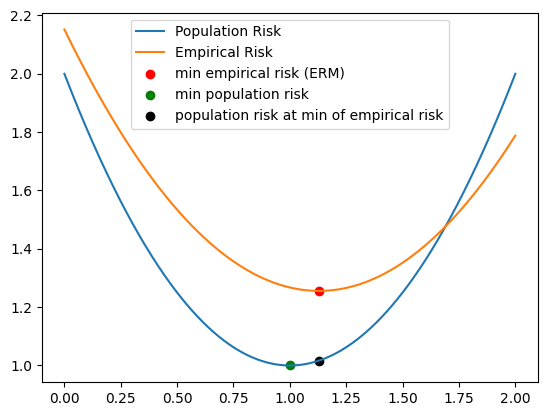

Population risk at min of empirical risk: 1.0167218341996216


In [6]:
plt.plot(a,population_risks, label="Population Risk")
plt.plot(a,empirical_risks, label="Empirical Risk")
plt.scatter(a[np.argmin(empirical_risks)],empirical_risks[np.argmin(empirical_risks)],c="red",label="min empirical risk (ERM)")
plt.scatter(a[np.argmin(population_risks)],population_risks[np.argmin(population_risks)],c="green",label="min population risk")
plt.scatter(a[np.argmin(empirical_risks)],population_risks[np.argmin(empirical_risks)],c="black",label="population risk at min of empirical risk")

plt.legend()
plt.show()

print(f"Population risk at min of empirical risk: {population_risks[np.argmin(empirical_risks)]}")


### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [7]:
# excess risk
abs(empirical_risks[np.argmin(empirical_risks)] - population_risks[np.argmin(empirical_risks)])

0.23891298767727354

In [8]:
# simulations with fixed sample size
excess_risk=[]
for i in range(200):
    X = np.random.normal(0,1,50)
    eps =  np.random.normal(0,1,50)
    Y = X + eps
    a = np.linspace(0,2,10000)
    population_risks = [population_risk(i,1) for i in a]
    empirical_risks = [empirical_risk(i,X,Y) for i in a]
    excess_risk.append(abs(empirical_risks[np.argmin(empirical_risks)] - population_risks[np.argmin(empirical_risks)]))
np.mean(excess_risk)

0.1805797127175181

In [9]:
# simulations for various sample sizes
n_excess_risk = []
for n in range(10,1000,10):
    excess_risk=[]
    for i in range(200):
        X = np.random.normal(0,1,n)
        eps =  np.random.normal(0,1,n)
        Y = X + eps
        a = np.linspace(0,2,10000)
        population_risks = [population_risk(i,1) for i in a]
        empirical_risks = [empirical_risk(i,X,Y) for i in a]
        a_hat = np.argmin(empirical_risks)
        excess_risk.append(abs(empirical_risks[a_hat] - population_risks[a_hat]))
    n_excess_risk.append(np.mean(excess_risk))

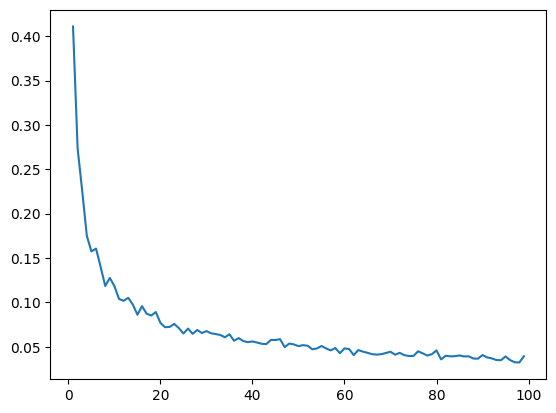

In [13]:
plt.plot(range(1,100),n_excess_risk)
plt.show()